# Part 2 Math grades for both schools

The machine learning project is done in Jupyter Notebook as I am more familiar with this IDE as compared to R Programming

In [1]:
import pandas as pd                  #Importing the required package
import numpy as np
import matplotlib.pyplot as plt
import os, types
from botocore.client import Config
import ibm_boto3
import seaborn as sns

In [20]:
def __iter__(self): return 0                

# Reading the CSV file

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_425cb5db82064ac9826470a9ee413dde = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_425cb5db82064ac9826470a9ee413dde = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_425cb5db82064ac9826470a9ee413dde = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SQcf4P6rw2FExdY9A6ARimxqunY0S68mDkBxQ4NaUw1W',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_425cb5db82064ac9826470a9ee413dde)

body = client_425cb5db82064ac9826470a9ee413dde.get_object(Bucket='part2mathcodes-donotdelete-pr-o8v3b647kncuhp',Key='student-mat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df = df.drop(['G1','G2'],axis=1) #dropping columns G1 and G2 in order to get a more precise prediction
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [4]:
print("Number of rows:", len(df)) #Looking for number of rows in total

Number of rows: 395


In [5]:
df.isna().sum() #Checking for Null Values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [6]:
df.info()             #checking for Data types of each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
for var in ['traveltime','studytime','Medu','Fedu','famrel','freetime','goout','Dalc','Walc','health']:
    df[var] = df[var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

In [8]:
num_col = df._get_numeric_data().columns         #Getting the numerical dataset from original into another data set
cat_col = list(set(df.columns)-set(num_col))     #By removing the numerical dataset from original, it is able to retrieve the categorical dataset 
num_col = list(num_col)[0:3]

In [9]:
nominal_col = ['higher','Fjob','address','guardian','school','paid','sex','Mjob','activities','reason','nursery','romantic','internet','Pstatus','famsup','schoolsup','famsize']
ordinal_col = np.setdiff1d(cat_col,nominal_col)

In [10]:
for col in ordinal_col:
    df[col]=df[col].astype(int)                  # Changing Ordinal data to integer data format

In [11]:
for col in df[cat_col]:                          # Checking for erroneous data in categorical data
    print(col,df[col].unique())

famsup ['no' 'yes']
sex ['F' 'M']
famrel [4 5 3 1 2]
address ['U' 'R']
Medu [4 1 3 2 0]
goout [4 3 2 1 5]
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
Pstatus ['A' 'T']
higher ['yes' 'no']
Dalc [1 2 5 3 4]
romantic ['no' 'yes']
freetime [3 2 4 1 5]
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
nursery ['yes' 'no']
Walc [1 3 2 4 5]
famsize ['GT3' 'LE3']
paid ['no' 'yes']
Fedu [4 1 2 3 0]
studytime [2 3 1 4]
internet ['no' 'yes']
school ['GP' 'MS']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
health [3 5 1 2 4]
traveltime [2 1 3 4]
activities ['no' 'yes']
schoolsup ['yes' 'no']


In [12]:
df[num_col].describe()

,age,failures,absences
count,395.000000,395.000000,395.000000
mean,16.696203,0.334177,5.708861
std,1.276043,0.743651,8.003096
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000
50%,17.000000,0.000000,4.000000
75%,18.000000,0.000000,8.000000
max,22.000000,3.000000,75.000000


In [13]:
for i in df[num_col]:
    print(i,df[i].unique())

age [18 17 15 16 19 22 20 21]
failures [0 3 2 1]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


In [14]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [15]:
df['G3'].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4])

## Exploratory Data Analytics

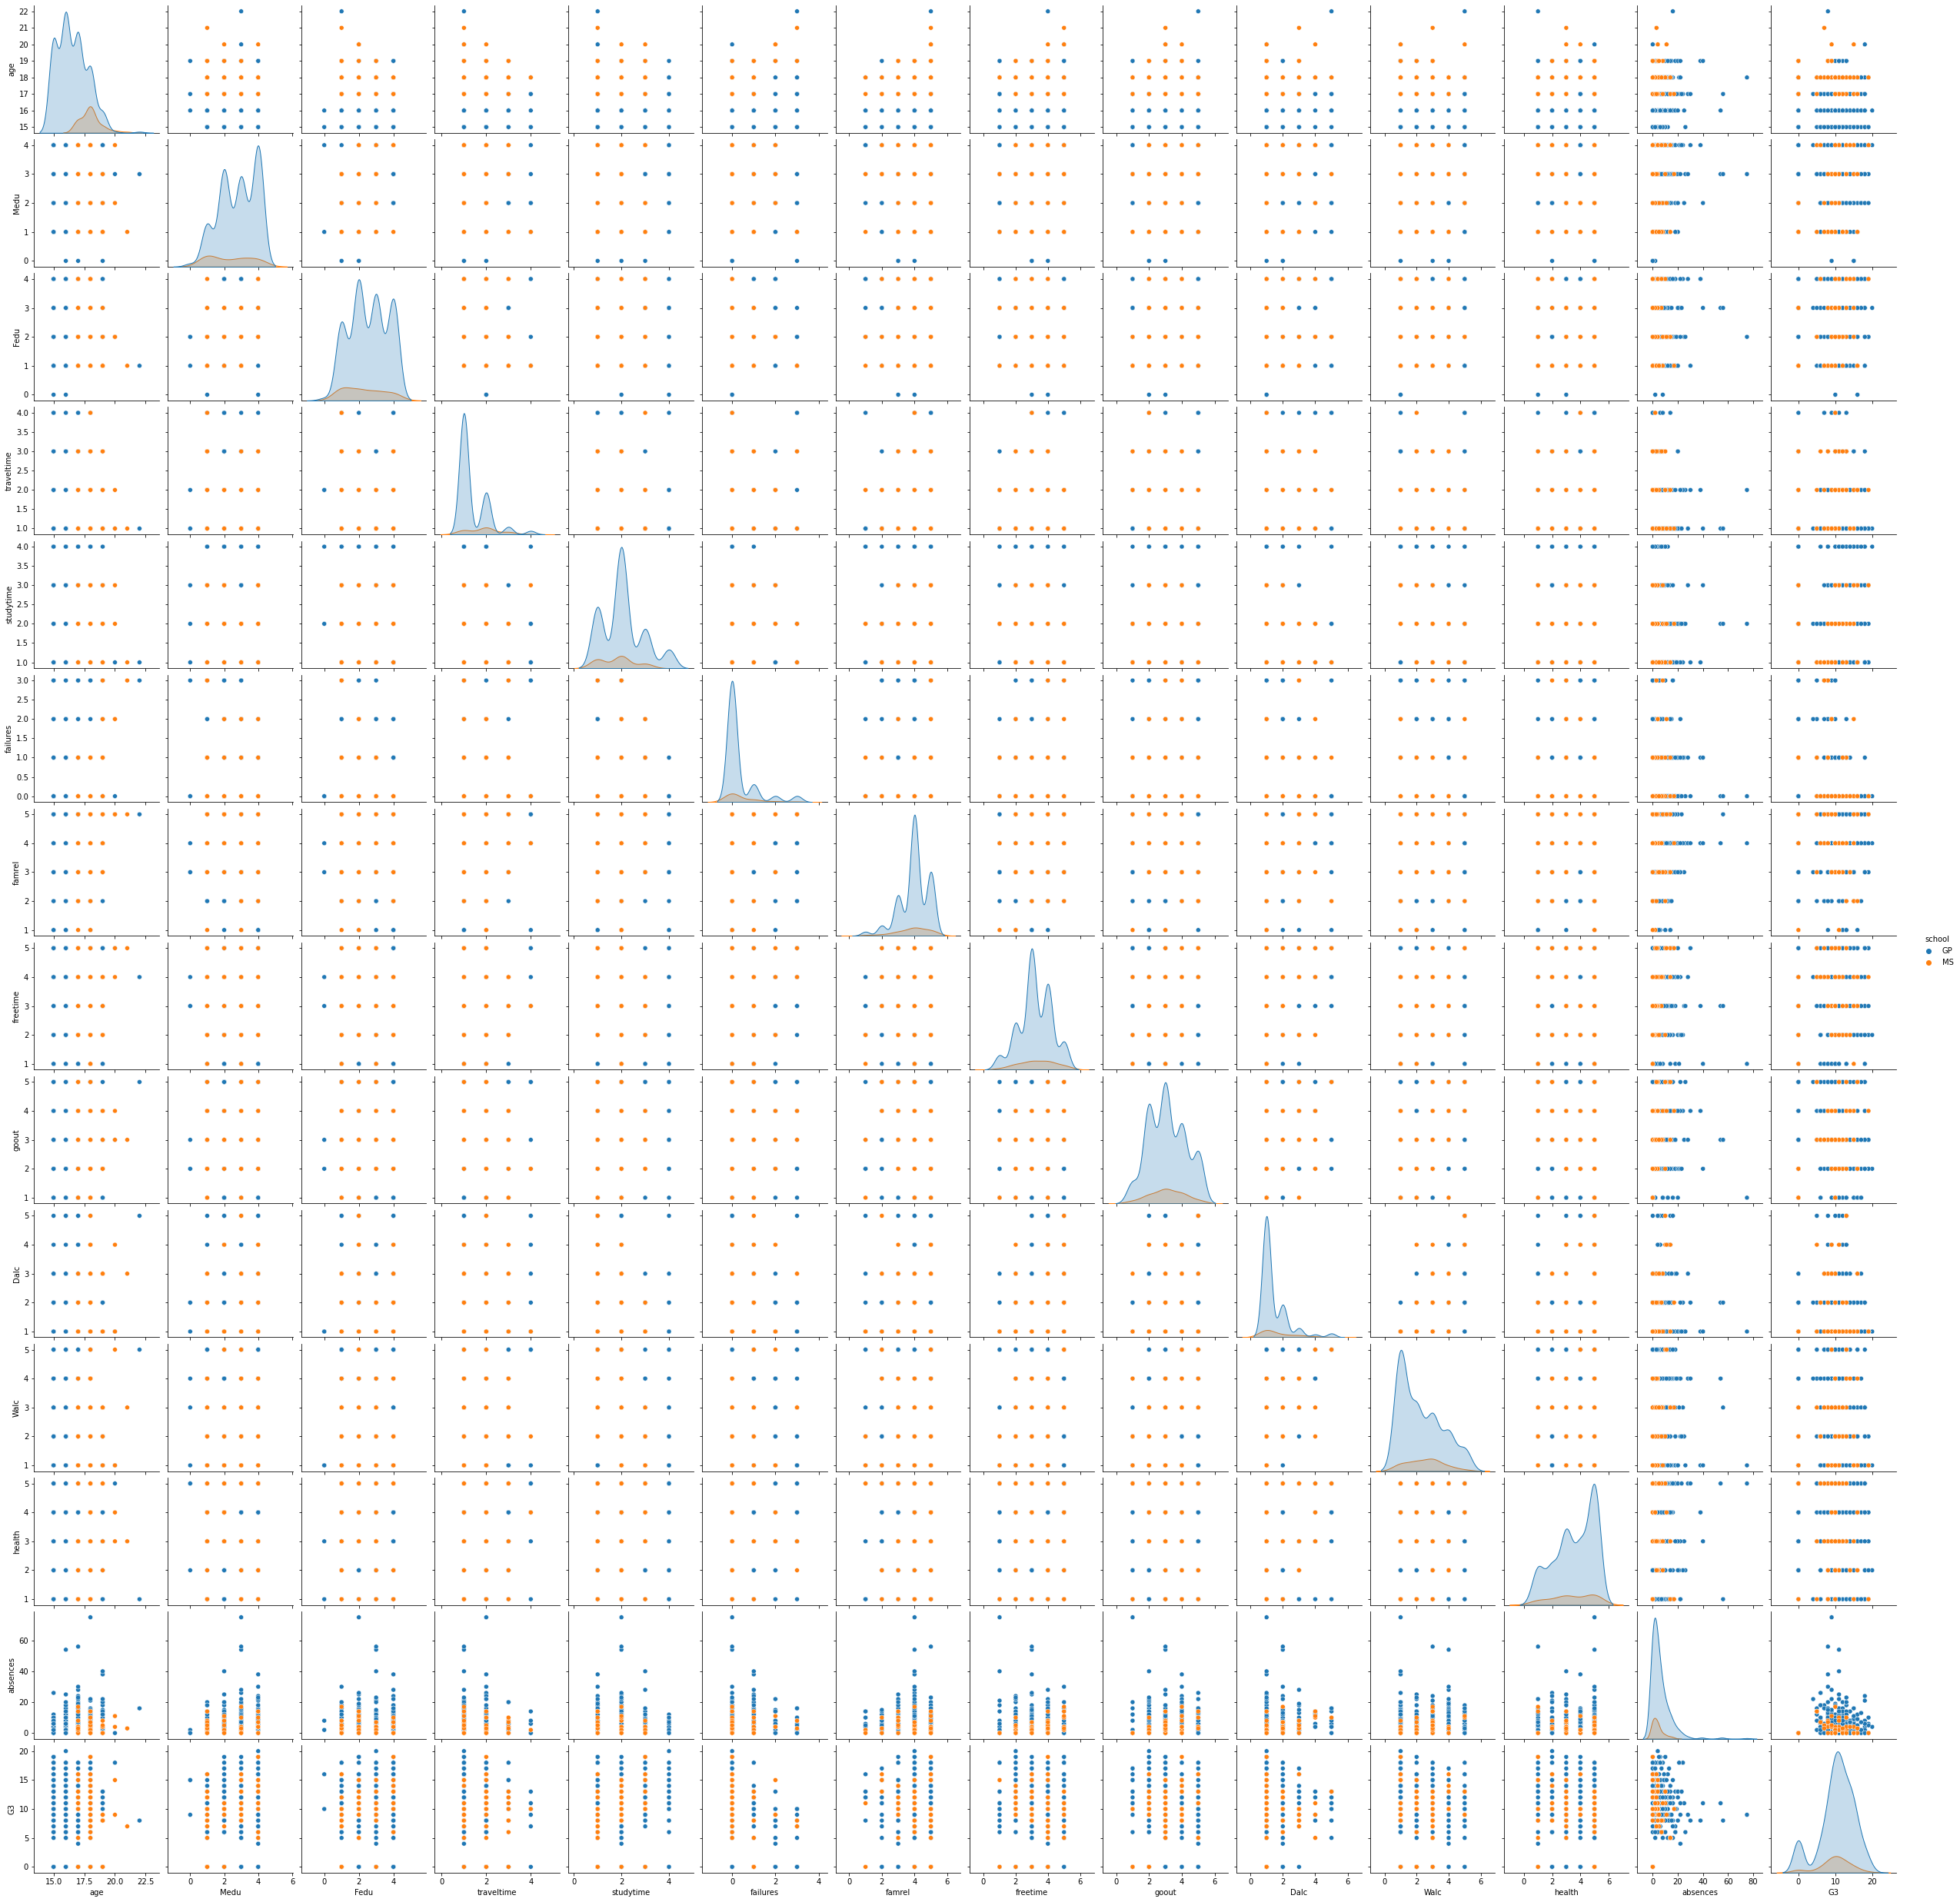

In [16]:
import seaborn as sns
sns.pairplot(df, hue = 'school')

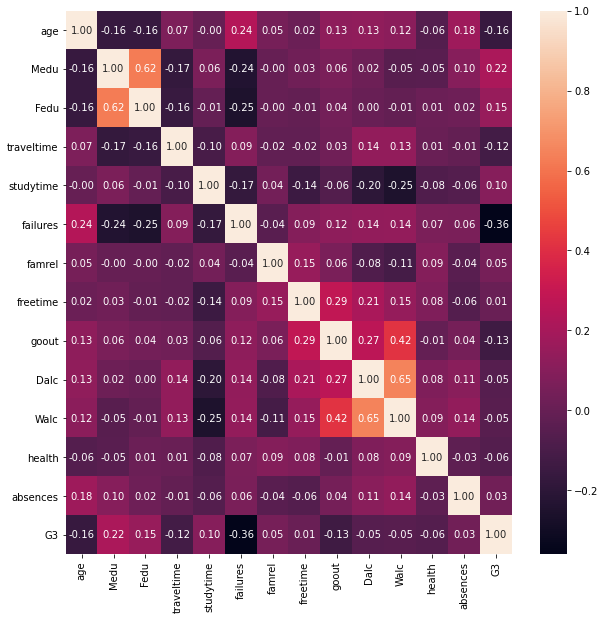

In [17]:
corrs = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrs, annot=True, fmt='.2f', ax=ax)
plt.show()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='school', ylabel='age'>

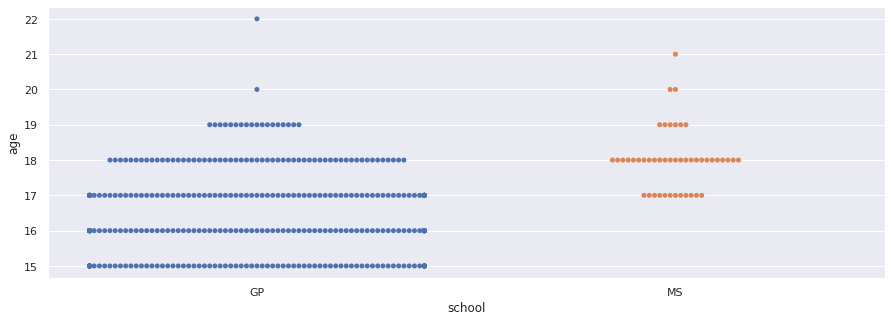

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
sns.swarmplot(data=df, x='school', y='age')